In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats
import seaborn as sns

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

@hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0a8af441fb464063b05888f8db175a1a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='U1vU60e6M_SMAio2mk1HflgBf7rn8wMwW8q03zj35ucH',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_0a8af441fb464063b05888f8db175a1a.get_object(Bucket='lifeexpectancy-donotdelete-pr-iw6jr1urk06fjt',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.


In [3]:
life_data = pd.read_csv(body)
life_data = life_data.drop('Year', axis = 1)

In [4]:
life_data.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
status = pd.get_dummies(life_data.Status)
life_data = pd.concat([life_data, status], axis = 1)
life_data = life_data.drop(['Status','Country'], axis=1)
life_data.rename(columns = {'Deloping' : '0', 'Developed' : 1})


,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,1,Developing
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
5,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,1
6,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,0,1
7,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,...,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,0,1
8,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,...,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,0,1
9,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,...,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,0,1


In [6]:
#life_data = life_data.groupby('Country').mean()
life_data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [7]:
life_data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

In [8]:
'''plt.scatter(life_data['Adult Mortality'], life_data['Life expectancy '],[15],'purple')
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy')'''

"plt.scatter(life_data['Adult Mortality'], life_data['Life expectancy '],[15],'purple')\nplt.xlabel('Adult Mortality')\nplt.ylabel('Life expectancy')"

In [9]:
#sns.pairplot(life_data)

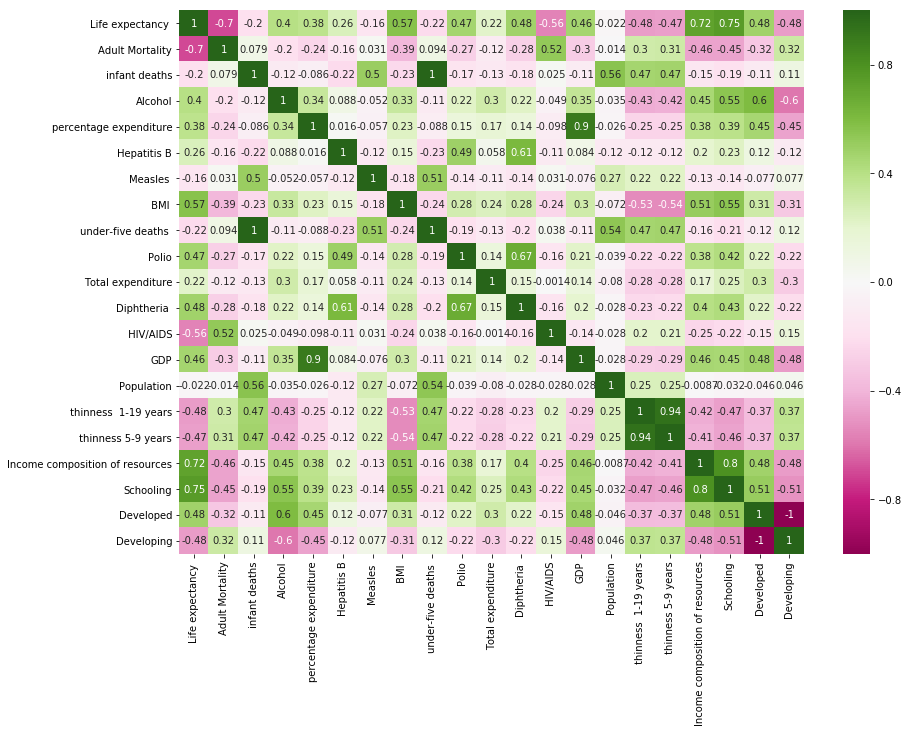

In [10]:
plt.figure(figsize = (14, 10))
sns.heatmap(life_data.corr(), annot = True,cmap="PiYG")

In [11]:
'''life_data = life_data.drop(['Adult Mortality', 'Alcohol',
        'Hepatitis B', ' BMI ',
         'Total expenditure', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'], axis=1)'''

"life_data = life_data.drop(['Adult Mortality', 'Alcohol',\n        'Hepatitis B', ' BMI ',\n         'Total expenditure', 'GDP', 'Population', ' thinness  1-19 years',\n       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'], axis=1)"

In [12]:
'''plt.figure(figsize = (14, 10))
sns.heatmap(life_data.corr(), annot = True,cmap="PiYG")'''

'plt.figure(figsize = (14, 10))\nsns.heatmap(life_data.corr(), annot = True,cmap="PiYG")'

In [13]:
life_data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

In [14]:
life_data

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
5,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,1
6,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,0,1
7,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,...,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7,0,1
8,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,...,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,0,1
9,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,...,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1,0,1


In [15]:
life_labels = life_data['Life expectancy ']
life_features = life_data.drop('Life expectancy ', axis = 1)

In [16]:
life_data.isnull().head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
life_features.isnull().head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
life_data.isnull().sum()

Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Developed                            0
Developing                           0
dtype: int64

In [19]:
life_features.isnull().sum()

Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Developed                            0
Developing                           0
dtype: int64

In [20]:
life_labels.isnull().sum()

10

In [21]:
life_data.fillna(value = life_data.mean(), inplace = True)

In [22]:
life_features.fillna(value = life_features.mean(), inplace = True)

In [23]:
life_labels.fillna(value = life_labels.mean(), inplace = True)

In [24]:
life_data.isnull().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Developed                          0
Developing                         0
dtype: int64

In [25]:
life_labels.isnull().sum()

0

In [26]:
stats.describe(life_features[1:])

DescribeResult(nobs=2937, minmax=(array([1.00000e+00, 0.00000e+00, 1.00000e-02, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 3.00000e+00, 3.70000e-01,
       2.00000e+00, 1.00000e-01, 1.68135e+00, 3.40000e+01, 1.00000e-01,
       1.00000e-01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]), array([7.23000000e+02, 1.80000000e+03, 1.78700000e+01, 1.94799116e+04,
       9.90000000e+01, 2.12183000e+05, 8.73000000e+01, 2.50000000e+03,
       9.90000000e+01, 1.76000000e+01, 9.90000000e+01, 5.06000000e+01,
       1.19172742e+05, 1.29385929e+09, 2.77000000e+01, 2.86000000e+01,
       9.48000000e-01, 2.07000000e+01, 1.00000000e+00, 1.00000000e+00])), mean=array([1.64763011e+02, 3.02931563e+01, 4.60442458e+00, 7.38478388e+02,
       8.09458887e+01, 2.42002315e+03, 3.83277911e+01, 4.20217909e+01,
       8.25762525e+01, 5.93743304e+00, 8.23299822e+01, 1.74266258e+00,
       7.48550743e+03, 1.27462307e+07, 4.83549538e+00, 4.86608470e+00,
       6.27601644e-01, 1.1993

In [27]:
min_max_scaler = MinMaxScaler()
life_features = min_max_scaler.fit_transform(life_features)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [28]:
life_features

array([[0.36288089, 0.03444444, 0.        , ..., 0.48792271, 0.        ,
        1.        ],
       [0.37396122, 0.03555556, 0.        , ..., 0.48309179, 0.        ,
        1.        ],
       [0.36980609, 0.03666667, 0.        , ..., 0.47826087, 0.        ,
        1.        ],
       ...,
       [0.09972299, 0.01388889, 0.2474804 , ..., 0.48309179, 0.        ,
        1.        ],
       [0.94875346, 0.01388889, 0.09574468, ..., 0.47342995, 0.        ,
        1.        ],
       [0.91966759, 0.01333333, 0.09350504, ..., 0.47342995, 0.        ,
        1.        ]])

In [29]:
life_features_train, life_features_test, life_labels_train, life_labels_test = train_test_split(
        life_features, life_labels, train_size = 0.7, test_size = 0.3)


# Training

In [30]:
linear_model = LinearRegression()
linear_model.fit(life_features_train, life_labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
print('R_square score on the training: %.2f' % linear_model.score(life_features_train, life_labels_train))

R_square score on the training: 0.81


In [32]:
linear_model_predict = linear_model.predict(life_features_test)

In [33]:
print('Coefficients: \n', linear_model.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))
print('R_square score: %.2f' % r2_score(life_labels_test, linear_model_predict))

Coefficients: 
 [ -13.61496015  199.72806658    0.91646762    1.56643921   -1.08448245
   -1.77729698    3.45442153 -210.51924386    2.8574382     0.93664194
    4.21046972  -25.02067894    3.35042073    1.32616512   -2.11018909
    0.29555827    5.58953381   13.64864722    0.89289005   -0.89289005]
Mean squared error: 15.57
Mean absolute error: 2.94
R_square score: 0.83


In [34]:
'''scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(Lasso(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000]},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(life_features_train, life_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))

result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" % grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))'''

'scoring = make_scorer(r2_score)\ngrid_cv = GridSearchCV(Lasso(),\n              param_grid={\'alpha\': range(0, 10), \'max_iter\' : [10, 100, 1000]},\n              scoring=scoring, cv=5, refit=True)\n\ngrid_cv.fit(life_features_train, life_labels_train)\nprint("Best Parameters: " + str(grid_cv.best_params_))\n\nresult = grid_cv.cv_results_\nprint("R^2 score on training data: %.2f" % grid_cv.score(life_features_train, life_labels_train))\nprint("R^2 score: %.2f"\n      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))\nprint("Mean squared error: %.2f"\n      % mean_squared_error(life_labels_test, linear_model_predict))\nprint("Mean absolute error: %.2f"\n      % mean_absolute_error(life_labels_test, linear_model_predict))'

In [35]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(ElasticNet(),
              param_grid={'alpha': range(0, 10), 'max_iter' : [10, 100, 1000], 'l1_ratio' : [0.1, 0.4, 0.8]},
              scoring=scoring, cv=5, refit=True)

grid_cv.fit(life_features_train, life_labels_train)
print("Best Parameters: " + str(grid_cv.best_params_))

result = grid_cv.cv_results_
print("R^2 score on training data: %.2f" % grid_cv.score(life_features_train, life_labels_train))
print("R^2 score: %.2f"
      % r2_score(life_labels_test, grid_cv.best_estimator_.predict(life_features_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(life_labels_test, linear_model_predict))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimato

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very sm

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimato

Best Parameters: {'alpha': 0, 'l1_ratio': 0.1, 'max_iter': 1000}
R^2 score on training data: 0.81
R^2 score: 0.83
Mean squared error: 15.57
Mean absolute error: 2.94


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:740: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [50]:
predictions = linear_model.predict(life_features_test)

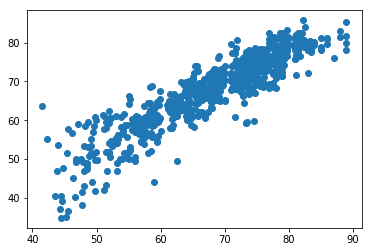

In [51]:
plt.scatter(life_labels_test,predictions)

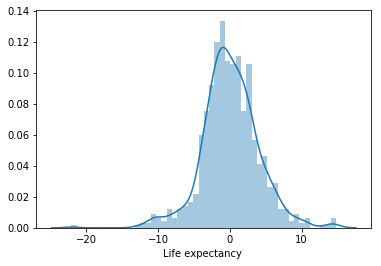

In [52]:
sns.distplot((life_labels_test-predictions),bins=50);

# Linking to Watson

In [53]:
@hidden cell
!pip install watson-machine-learning-client

In [ ]:
@hidden cell
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [54]:
@hidden cell
wml_credentials={
  "apikey": "fdQYOL7rQa9Lb_2ohzGk3JXqWa31P4WKr4p0IcQM2FVt",
  "instance_id": "486da02e-390e-47aa-a823-141d46082113",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [56]:
@hidden cell
client = WatsonMachineLearningAPIClient( wml_credentials )

In [57]:
@hidden cell
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Nikitha", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "nikithamarythomas@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Life_Expectancy"}

In [58]:
@hidden cell
model_artifact =client.repository.store_model(linear_model, meta_props=model_props)

In [59]:
@hidden cell
published_model_uid = client.repository.get_model_uid(model_artifact)

In [60]:
@hidden cell
published_model_uid

'f9d2e195-8c4e-49dc-b393-17f11302f3e9'

In [61]:
@hidden cell
deployment = client.deployments.create(published_model_uid, name="Life_Expectancy")



#######################################################################################

Synchronous deployment creation for uid: 'f9d2e195-8c4e-49dc-b393-17f11302f3e9' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='f0863b13-375f-4092-816f-b9071d2d47ce'
------------------------------------------------------------------------------------------------




In [62]:
@hidden_cell
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [63]:
@hidden_cell
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/486da02e-390e-47aa-a823-141d46082113/deployments/f0863b13-375f-4092-816f-b9071d2d47ce/online'